# Assignment 6

### 1.复习上课内容以及复现课程代码

在本部分，你需要复习上课内容和课程代码后，自己复现课程代码。

### 2.回答以下理论题目?

#### 1. Compared to FNN, what is the biggest advantage of CNN?

ans:CNN最大优点是需要训练的参数比全连接神经网络要少得多。

#### 2. Suppose your input is a 100 by 100 gray image, and you use a convolutional layer with 50 filters that are each 5x5. How many parameters does this hidden layer have (including the bias parameters)? 

ans:parameters = 5 \* 5 \* 100 + 50(feature map) = 2500 + 50 = 2550

#### 3. What are "local invariant" and "parameter sharing" ?

ans: 局部不变性、平移不变性：图片中的关键信息在图片中移动后，还是能得到相同的出列结果。即，在图像处理或者识别过程中，使用卷积核得到这个图的特征；把图中的关键信息移动到一个新的位置，再使用刚才的卷积核处理后得到一个新的特征值，这两个特征值是一样的，这种现象叫做local invariant

参数共享：在识别或处理某类图像时，识别图中不同位置的关键信息时，使用的卷积核是不变的，叫做参数共享

#### 4. Why we use batch normalization ?

ans: 1.在多层神经网络中，为了保证每层学习的结果平稳，并满足高斯分布
2. 给激活函数使用，使激活函数的结果不会落在梯度下降过慢或者梯度为零区域，用于保证学习率

#### 5. What problem does dropout try to solve ?

ans: 为了解决全连接神经网络的过拟合问题，每次训练时按照一定比例随机把神经网络的连接点去掉，以达到降低训练参数的效果，从而解决过拟合问题。

#### 6.  Is the following statement correct and why ? "Because pooling layers do not have parameters, they do not affect  the backpropagation(derivatives) calculation"

ans:错的。pooling虽然没有参数，但是在正向传播过程过，会损失一些信息，这些损失的信息在反向传播时时需要考虑的，所以说是错的。

### 3. 实践题

#### 3.1 In the first session of the practical part, you will implement an image classification model using any deep learning libraries that you are familiar with,  which means, except for tensorflow and keras, you can also use pytorch/caffe/... .  The dataset used in this session is the cifar10 which contains 50000 color (RGB) images, each with size 32x32x3.  All 50000 images are classified into ten categories. 

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import os
/
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x  #gpu
except Exception:
  pass
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
tf.executing_eagerly()

True

Load the dataset. 

In [3]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [20]:
map = {
    0:'airplane',
    1:'automobile',
    2:'bird',
    3:'cat',
    4:'deer',
    5:'dog',
    6:'frog',
    7:'horse',
    8:'ship',
    9:'truck'
    }

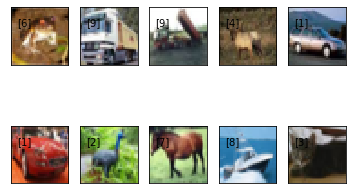

In [7]:
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(x_train[i-1])
    plt.text(3,10,str(y_train[i-1]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [8]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
#print(x_train[0])
print(max(y_train))
print(min(y_train))

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)
[9]
[0]


In [4]:
#对每个维度进行归一化
x_trainfix = tf.cast(x_train[...]/255, tf.float32),
x_testfix = tf.cast(x_test[...]/255, tf.float32),

#y_train = y_train.astype('float32')
#y_test = y_test.astype('float32')
y_trainfix = tf.keras.utils.to_categorical(y_train,10)
y_testfix = tf.keras.utils.to_categorical(y_test,10)

##### It is your time to build your model. Try your best to build a model with good performance on the test set.

In [5]:
#Build the model using Sequential
cifar10_LetNet5_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(8,[5,5],input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(16,[5,5]),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120,activation="relu"),
    tf.keras.layers.Dense(84,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])
cifar10_LetNet5_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 8)         608       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        3216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [7]:
cifar10_LetNet5_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-2),
loss = tf.keras.losses.categorical_crossentropy,
metrics = ["accuracy"])
cifar10_LetNet5_model.fit(x_trainfix,y_trainfix,batch_size=128,epochs=10,validation_split=0.2,verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 15s 366us/sample - loss: 1.5576 - accuracy: 0.4422 - val_loss: 1.5450 - val_accuracy: 0.4433
Epoch 2/10
40000/40000 [==============================] - 15s 386us/sample - loss: 1.4920 - accuracy: 0.4626 - val_loss: 1.5020 - val_accuracy: 0.4620
Epoch 3/10
40000/40000 [==============================] - 14s 344us/sample - loss: 1.4514 - accuracy: 0.4779 - val_loss: 1.4688 - val_accuracy: 0.4743
Epoch 4/10
40000/40000 [==============================] - 17s 435us/sample - loss: 1.4180 - accuracy: 0.4895 - val_loss: 1.4463 - val_accuracy: 0.4822
Epoch 5/10
40000/40000 [==============================] - 16s 408us/sample - loss: 1.3881 - accuracy: 0.5032 - val_loss: 1.4122 - val_accuracy: 0.4951
Epoch 6/10
40000/40000 [==============================] - 16s 397us/sample - loss: 1.3610 - accuracy: 0.5117 - val_loss: 1.3978 - val_accuracy: 0.5029
Epoch 7/10
40000/40000 [====================

In [8]:
cifar10_LetNet5_model.evaluate(x_testfix,y_testfix)

10000/10000 [==============================] - 2s 170us/sample - loss: 1.3255 - accuracy: 0.5217


[1.3255280061721801, 0.5217]

In [71]:
#Build the model using Sequential
cifar10_Vgg_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64,[3,3],input_shape=(32,32,3)),
    tf.keras.layers.Conv2D(64,[3,3]),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(128,[3,3]),
    tf.keras.layers.Conv2D(128,[3,3]),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(256,[3,3]),
    tf.keras.layers.Conv2D(256,[3,3]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation="relu"),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])
cifar10_Vgg_model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_90 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 12, 12, 128)       73856     
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 10, 10, 128)       147584    
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 3, 3, 256)       

In [72]:
cifar10_Vgg_model.compile(optimizer=tf.keras.optimizers.Adam(),
loss = tf.keras.losses.categorical_crossentropy,
metrics = ["accuracy"])
cifar10_Vgg_model.fit(x_trainfix,y_trainfix,batch_size=128,epochs=10,validation_split=0.2,verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 187s 5ms/sample - loss: 1.5690 - accuracy: 0.4322 - val_loss: 1.2920 - val_accuracy: 0.5465
Epoch 2/10
40000/40000 [==============================] - 191s 5ms/sample - loss: 1.1749 - accuracy: 0.5883 - val_loss: 1.1517 - val_accuracy: 0.5930
Epoch 3/10
40000/40000 [==============================] - 189s 5ms/sample - loss: 1.0188 - accuracy: 0.6414 - val_loss: 1.0476 - val_accuracy: 0.6393
Epoch 4/10
40000/40000 [==============================] - 186s 5ms/sample - loss: 0.9267 - accuracy: 0.6784 - val_loss: 1.0861 - val_accuracy: 0.6226
Epoch 5/10
40000/40000 [==============================] - 187s 5ms/sample - loss: 0.8510 - accuracy: 0.7024 - val_loss: 0.9579 - val_accuracy: 0.6673
Epoch 6/10
40000/40000 [==============================] - 185s 5ms/sample - loss: 0.7672 - accuracy: 0.7338 - val_loss: 0.9417 - val_accuracy: 0.6784
Epoch 7/10
40000/40000 [==========================

In [73]:
cifar10_Vgg_model.evaluate(x_testfix,y_testfix)

10000/10000 [==============================] - 10s 1ms/sample - loss: 1.0457 - accuracy: 0.6769


[1.0456836120605468, 0.6769]

In [83]:
#Build the model using Sequential
cifar10_Vgg_model1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64,[3,3],padding = 'same',input_shape=(32,32,3)),
    tf.keras.layers.Conv2D(64,[3,3]),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(128,[3,3],padding = 'same'),
    tf.keras.layers.Conv2D(128,[3,3]),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(256,[3,3],padding = 'same'),
    tf.keras.layers.Conv2D(256,[3,3],padding = 'same'),
    tf.keras.layers.Conv2D(256,[3,3]),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024,activation="relu"),
    tf.keras.layers.Dense(256,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])
cifar10_Vgg_model1.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_150 (Conv2D)          (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_151 (Conv2D)          (None, 30, 30, 64)        36928     
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_152 (Conv2D)          (None, 15, 15, 128)       73856     
_________________________________________________________________
conv2d_153 (Conv2D)          (None, 13, 13, 128)       147584    
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_154 (Conv2D)          (None, 6, 6, 256)       

In [84]:
cifar10_Vgg_model1.compile(optimizer=tf.keras.optimizers.Adam(),
loss = tf.keras.losses.categorical_crossentropy,
metrics = ["accuracy"])
cifar10_Vgg_model1.fit(x_trainfix,y_trainfix,batch_size=128,epochs=10,validation_split=0.2,verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 334s 8ms/sample - loss: 1.6492 - accuracy: 0.4011 - val_loss: 1.2477 - val_accuracy: 0.5549
Epoch 2/10
40000/40000 [==============================] - 334s 8ms/sample - loss: 1.1668 - accuracy: 0.5898 - val_loss: 1.1852 - val_accuracy: 0.5918
Epoch 3/10
40000/40000 [==============================] - 335s 8ms/sample - loss: 0.9772 - accuracy: 0.6592 - val_loss: 1.0775 - val_accuracy: 0.6353
Epoch 4/10
40000/40000 [==============================] - 341s 9ms/sample - loss: 0.8681 - accuracy: 0.6963 - val_loss: 0.9186 - val_accuracy: 0.6884
Epoch 5/10
40000/40000 [==============================] - 370s 9ms/sample - loss: 0.7589 - accuracy: 0.7386 - val_loss: 0.8869 - val_accuracy: 0.6955
Epoch 6/10
40000/40000 [==============================] - 344s 9ms/sample - loss: 0.6967 - accuracy: 0.7592 - val_loss: 0.9456 - val_accuracy: 0.6824
Epoch 7/10
40000/40000 [==========================

In [85]:
cifar10_Vgg_model1.evaluate(x_testfix,y_testfix)

10000/10000 [==============================] - 19s 2ms/sample - loss: 1.0091 - accuracy: 0.6999


[1.0090595363616943, 0.6999]

In [6]:
#Build the model using Sequential
cifar10_Vgg_model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64,[3,3],activation="relu",padding = 'same',input_shape=(32,32,3)),
    tf.keras.layers.Conv2D(64,[3,3],activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(128,[3,3],activation="relu",padding = 'same'),
    tf.keras.layers.Conv2D(128,[3,3],activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(256,[3,3],activation="relu",padding = 'same'),
    tf.keras.layers.Conv2D(256,[3,3],activation="relu",padding = 'same'),
    tf.keras.layers.Conv2D(256,[3,3],activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024,activation="relu"),
    tf.keras.layers.Dense(256,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])
cifar10_Vgg_model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 30, 30, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 128)       73856     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 128)       147584    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 6, 6, 256)        

In [ ]:
cifar10_Vgg_model2.compile(optimizer=tf.keras.optimizers.Adam(),
loss = tf.keras.losses.categorical_crossentropy,
metrics = ["accuracy"])
cifar10_Vgg_model2.fit(x_trainfix,y_trainfix,batch_size=128,epochs=10,validation_split=0.2,verbose=1)

In [ ]:
cifar10_Vgg_model2.evaluate(x_testfix,y_testfix)

### 4. Optional 

##### Do you want to build a CNN from scratch ? 

In this optianl part, you will build a cnn network step by step.

In [24]:
import numpy as np
np.random.seed(1)

##### 4.1 Implement a convolution step

Hints: Numpy.sum function might be useful.

In [21]:
def conv_single_step(a_prev_slice,W,b):
    '''
    Apply one filter defined by parameters W on a single slice (a_slice_prev) of the output activation 
    of the previous layer.
    Arguments:
    a_prev_slice: slice of input data (shape=(f,f,n_C_prev))
    W: Weight parameters contained in a window. (shape = (f,f,n_C_prev))
    b: Bias parameters contained in a window. (shape=(1,1,1))
    
    Reutrns:
    
    Z: a scalar value, the result of convolving the sliding window (W, b) on a slice x of the input data 
    '''
    # Element-wise product
    s = None
    
    # Sum over s  
    Z = None
    
    # Add bias b to z.
    Z = None
    
    return Z

In [ ]:
np.random.seed(1)
a_slice_prev = np.random.randn(4, 4, 3)
W = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)

Z = conv_single_step(a_slice_prev, W, b)
print("Z =", Z)

Use the code above to test your code. If your c
ode is correct, you should be able to get the output shown as below.

<table>
    <tr>
        <td>
            Z
        </td>
        <td>
            -6.99908945068
        </td>
    </tr>

</table>

##### 4.2 Padding

Hints: Numpy.pad function might be useful.

In [ ]:
def zero_pad(X, pad):
    """
    Pad with zeros all images of the dataset X. The padding is applied to the height and width of an image, 
    as illustrated in Figure 1.
    
    Argument:
    X: python numpy array of shape (m, n_H, n_W, n_C) representing a batch of m images
    pad: integer, amount of padding around each image on vertical and horizontal dimensions
    
    Returns:
    X_pad: padded image of shape (m, n_H + 2*pad, n_W + 2*pad, n_C)
    """

    X_pad = None
    
    return X_pad

In [ ]:
np.random.seed(1)
x = np.random.randn(4, 3, 3, 2)
x_pad = zero_pad(x, 2)
print ("x.shape =\n", x.shape)
print ("x_pad.shape =\n", x_pad.shape)
print ("x[1,1] =\n", x[1,1])
print ("x_pad[1,1] =\n", x_pad[1,1])

Use the code above to test your code. If your code is correct, you should be able to get the output shown as below.

```
x.shape =
 (4, 3, 3, 2)
x_pad.shape =
 (4, 7, 7, 2)
x[1,1] =
 [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1] =
 [[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]
```

##### 4.3 Implement a forward propagation in CNN.

Hints: The formulas to calculate the output shapes are :

$$ n_H = \lfloor \frac{n_{H_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$
$$ n_W = \lfloor \frac{n_{W_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$
$$ n_C = \text{number of filters used in the convolution}$$

In [ ]:
def conv_forward(A_prev, W, b, hparameters):
    """
    Implements the forward propagation for a convolution function
    
    Arguments:
    A_prev: output activations of the previous layer, 
        numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    W: Weights, numpy array of shape (f, f, n_C_prev, n_C)
    b: Biases, numpy array of shape (1, 1, 1, n_C)
    hparameters: python dictionary containing "stride" and "pad"
        
    Returns:
    Z: conv output, numpy array of shape (m, n_H, n_W, n_C)
    cache: cache of values needed for the conv_backward() function
    """
    
    # Get dimensions from A_prev's shape  
    (m, n_H_prev, n_W_prev, n_C_prev) = None
    
    # Get dimensions from W's shape 
    (f, f, n_C_prev, n_C) = None
    
    # Get information from "hparameters" 
    stride = None
    pad = None
    
    # Compute the dimensions of the CONV output volume using the formula given above. 
    # Hint: use int() to apply the 'floor' operation. 
    n_H = None
    n_W = None
    
    # Initialize the output volume Z with zeros. 
    Z = None
    
    # Create A_prev_pad by padding A_prev
    A_prev_pad = None
    
    for i in range(None):               # loop over the batch of training examples
        a_prev_pad = None               # Select ith training example's padded activation
        for h in range(None):           # loop over vertical axis of the output volume
            # Find the vertical start and end of the current "slice" 
            vert_start = None
            vert_end = None
            
            for w in range(None):       # loop over horizontal axis of the output volume
                # Find the horizontal start and end of the current "slice"
                horiz_start = None
                horiz_end = None
                
                for c in range(None):   # loop over channels (= #filters) of the output volume
                                        
                    # Use the corners to define the (3D) slice of a_prev_pad (See Hint above the cell). 
                    a_slice_prev = None
                    
                    # Convolve the (3D) slice with the correct filter W and bias b, to get back one output neuron. 
                    weights = None
                    biases = None
                    Z[i, h, w, c] = None
                                        
    
    # Making sure your output shape is correct
    assert(Z.shape == (m, n_H, n_W, n_C))
    
    # Save information in "cache" for the backprop
    cache = (A_prev, W, b, hparameters)
    
    return Z, cache

In [ ]:
np.random.seed(1)
A_prev = np.random.randn(10,5,7,4)
W = np.random.randn(3,3,4,8)
b = np.random.randn(1,1,1,8)
hparameters = {"pad" : 1,
               "stride": 2}

Z, cache_conv = conv_forward(A_prev, W, b, hparameters)
print("Z's mean =\n", np.mean(Z))
print("Z[3,2,1] =\n", Z[3,2,1])
print("cache_conv[0][1][2][3] =\n", cache_conv[0][1][2][3])

Use the code above to test your code. If your code is correct, you should be able to get the output shown as below.

```
Z's mean =
 0.692360880758
Z[3,2,1] =
 [ -1.28912231   2.27650251   6.61941931   0.95527176   8.25132576
   2.31329639  13.00689405   2.34576051]
cache_conv[0][1][2][3] = [-1.1191154   1.9560789  -0.3264995  -1.34267579]
```

##### 4.4 Pooling layers

Hints: As there\'s no padding, the formulas binding the output shape of the pooling to the input shape is:

$$ n_H = \lfloor \frac{n_{H_{prev}} - f}{stride} \rfloor +1 $$

$$ n_W = \lfloor \frac{n_{W_{prev}} - f}{stride} \rfloor +1 $$

$$ n_C = n_{C_{prev}}$$

In [ ]:
def pool_forward(A_prev, hparameters, mode = "max"):
    """
    Implements the forward pass of the pooling layer
    
    Arguments:
    A_prev: Input data, numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    hparameters: python dictionary containing "f" and "stride"
    mode: the pooling mode you would like to use, defined as a string ("max" or "average")
    
    Returns:
    A: output of the pool layer, a numpy array of shape (m, n_H, n_W, n_C)
    cache: cache used in the backward pass of the pooling layer, contains the input and hparameters 
    """
    
    # Get dimensions from the input shape
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    # Get hyperparameters from "hparameters"
    f = hparameters["f"]
    stride = hparameters["stride"]
    
    # Define the dimensions of the output
    n_H = int(1 + (n_H_prev - f) / stride)
    n_W = int(1 + (n_W_prev - f) / stride)
    n_C = n_C_prev
    
    # Initialize output matrix A
    A = np.zeros((m, n_H, n_W, n_C))              
    
    for i in range(None):                         # loop over the training examples
        for h in range(None):                     # loop on the vertical axis of the output volume
            # Find the vertical start and end of the current "slice" (≈2 lines)
            vert_start = None
            vert_end = None
            
            for w in range(None):                 # loop on the horizontal axis of the output volume
                # Find the vertical start and end of the current "slice" (≈2 lines)
                horiz_start = None
                horiz_end = None
                
                for c in range (None):            # loop over the channels of the output volume
                    
                    # Use the corners to define the current slice on the ith training example of A_prev, channel c. (≈1 line)
                    a_prev_slice = None
                    
                    # Compute the pooling operation on the slice. 
                    # Use an if statement to differentiate the modes. 
                    # Use np.max and np.mean.
                    if mode == "max":
                        A[i, h, w, c] = None
                    elif mode == "average":
                        A[i, h, w, c] = None
    
    # Store the input and hparameters in "cache" for pool_backward()
    cache = (A_prev, hparameters)
    
    # Making sure your output shape is correct
    assert(A.shape == (m, n_H, n_W, n_C))
    
    return A, cache

In [ ]:
np.random.seed(1)
A_prev = np.random.randn(2, 5, 5, 3)
hparameters = {"stride" : 1, "f": 3}

A, cache = pool_forward(A_prev, hparameters)
print("mode = max")
print("A.shape = " + str(A.shape))
print("A =\n", A)
print()
A, cache = pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A.shape = " + str(A.shape))
print("A =\n", A)

Use the code above to test your code. If your code is correct, you should be able to get the output shown as below.

```
mode = max
A.shape = (2, 3, 3, 3)
A =
 [[[[ 1.74481176  0.90159072  1.65980218]
   [ 1.74481176  1.46210794  1.65980218]
   [ 1.74481176  1.6924546   1.65980218]]

  [[ 1.14472371  0.90159072  2.10025514]
   [ 1.14472371  0.90159072  1.65980218]
   [ 1.14472371  1.6924546   1.65980218]]

  [[ 1.13162939  1.51981682  2.18557541]
   [ 1.13162939  1.51981682  2.18557541]
   [ 1.13162939  1.6924546   2.18557541]]]


 [[[ 1.19891788  0.84616065  0.82797464]
   [ 0.69803203  0.84616065  1.2245077 ]
   [ 0.69803203  1.12141771  1.2245077 ]]

  [[ 1.96710175  0.84616065  1.27375593]
   [ 1.96710175  0.84616065  1.23616403]
   [ 1.62765075  1.12141771  1.2245077 ]]

  [[ 1.96710175  0.86888616  1.27375593]
   [ 1.96710175  0.86888616  1.23616403]
   [ 1.62765075  1.12141771  0.79280687]]]]

mode = average
A.shape = (2, 3, 3, 3)
A =
 [[[[ -3.01046719e-02  -3.24021315e-03  -3.36298859e-01]
   [  1.43310483e-01   1.93146751e-01  -4.44905196e-01]
   [  1.28934436e-01   2.22428468e-01   1.25067597e-01]]

  [[ -3.81801899e-01   1.59993515e-02   1.70562706e-01]
   [  4.73707165e-02   2.59244658e-02   9.20338402e-02]
   [  3.97048605e-02   1.57189094e-01   3.45302489e-01]]

  [[ -3.82680519e-01   2.32579951e-01   6.25997903e-01]
   [ -2.47157416e-01  -3.48524998e-04   3.50539717e-01]
   [ -9.52551510e-02   2.68511000e-01   4.66056368e-01]]]


 [[[ -1.73134159e-01   3.23771981e-01  -3.43175716e-01]
   [  3.80634669e-02   7.26706274e-02  -2.30268958e-01]
   [  2.03009393e-02   1.41414785e-01  -1.23158476e-02]]

  [[  4.44976963e-01  -2.61694592e-03  -3.10403073e-01]
   [  5.08114737e-01  -2.34937338e-01  -2.39611830e-01]
   [  1.18726772e-01   1.72552294e-01  -2.21121966e-01]]

  [[  4.29449255e-01   8.44699612e-02  -2.72909051e-01]
   [  6.76351685e-01  -1.20138225e-01  -2.44076712e-01]
   [  1.50774518e-01   2.89111751e-01   1.23238536e-03]]]]
```

####  Congratulations! You hanve finished the assignment 6.  You now understand how convolutional neural networks work.